In [588]:
import pandas as pd
import numpy as np

from scipy.stats import sem
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import date
from datetime import datetime

sns.set()
sns.set_style("white")

In [589]:
movies = pd.read_csv('2013_movies.csv')

In [590]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [591]:
movies.sort_values(by=['ReleaseDate']).head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04 00:00:00
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11 00:00:00
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11 00:00:00
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18 00:00:00
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25 00:00:00


In [592]:
movies['ReleaseDate'] = movies.apply(lambda x: (pd.to_datetime(x['ReleaseDate'])), axis=1)
movies['ShortDate'] = movies.apply(lambda x: \
                                   (x['ReleaseDate'].strftime('%m')+"-"+x['ReleaseDate'].strftime('%d')), axis=1)
movies['Month'] = movies.apply(lambda x: \
                                   (x['ReleaseDate'].strftime('%m')), axis=1)
movies['ReleaseDate'] = movies['ReleaseDate'].dt.date

In [593]:
movies_gb_date = (movies
                  .groupby(["ShortDate"],as_index=False)["DomesticTotalGross"]
                  .sum())

In [594]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ShortDate,Month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,05-03,05
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11-22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,07-03,07
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,06-14,06


In [595]:
movies_gb_date.head()

,ShortDate,DomesticTotalGross
0,01-04,34341945
1,01-11,86042586
2,01-18,71628180
3,01-25,55703475
4,02-01,66380662


In [596]:
movies_gb_runtime = (movies
                  .groupby(["Runtime"],as_index=False)["DomesticTotalGross"]
                  .sum())

In [597]:
movies_gb_runtime.head()

,Runtime,DomesticTotalGross
0,75,32244051
1,80,40041683
2,85,96488902
3,87,36076121
4,88,55703475


In [598]:
movies_gb_date_rating = (movies
                  .groupby(["ShortDate", "Rating"],as_index=False)["DomesticTotalGross"]
                  .sum())

In [599]:
movies_gb_date_rating.head()

,ShortDate,Rating,DomesticTotalGross
0,01-04,R,34341945
1,01-11,R,86042586
2,01-18,PG-13,71628180
3,01-25,R,55703475
4,02-01,PG-13,66380662


## Challenge 1
## Plot domestic total gross over time.

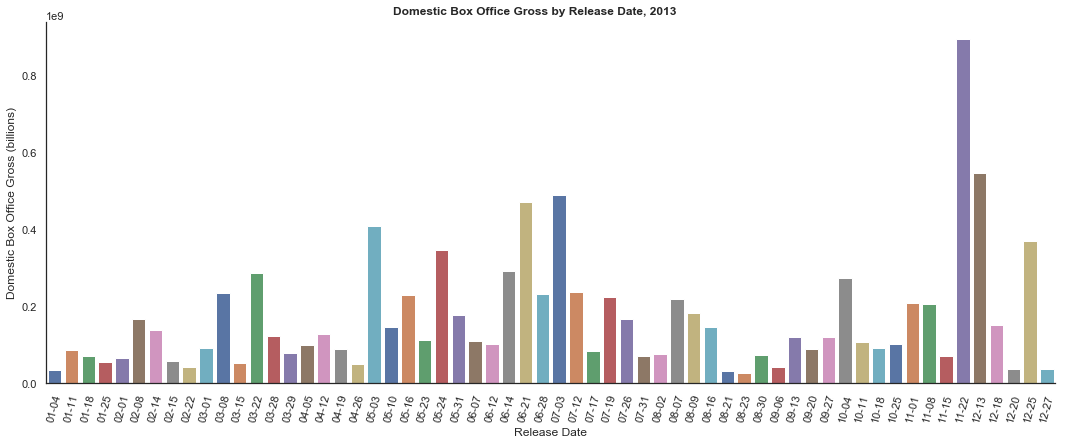

In [600]:
sns_plot = sns.catplot(x="ShortDate", y="DomesticTotalGross", palette="deep", \
                       data=movies_gb_date, kind='bar', height=6, aspect=20/8)
sns_plot.fig.suptitle("Domestic Box Office Gross by Release Date, 2013", fontsize=12, fontweight='bold')
sns_plot.set_axis_labels("Release Date", "Domestic Box Office Gross (billions)")
sns_plot.set_xticklabels(rotation=75)
sns.despine()

## Challenge 2
## Plot runtime vs. domestic total gross.

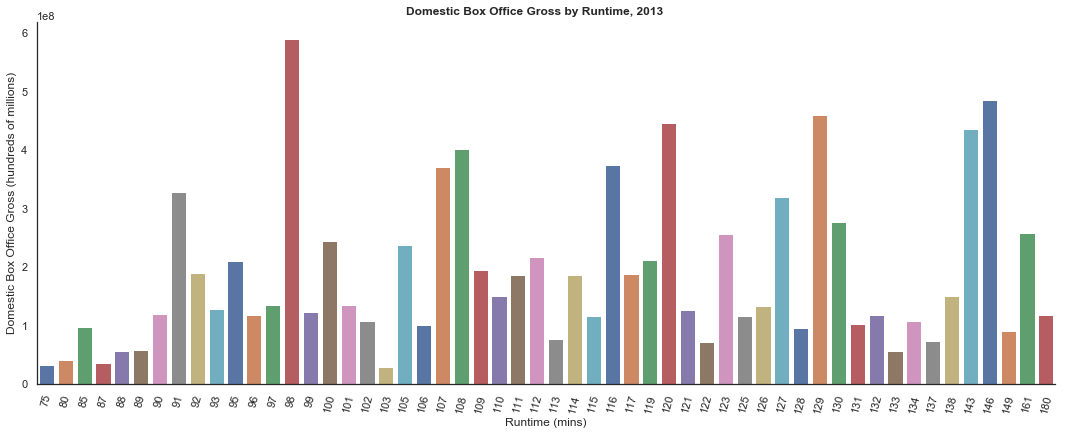

In [621]:
sns_plot = sns.catplot(x="Runtime", y="DomesticTotalGross", palette="deep", \
                       data=movies_gb_runtime, kind='bar', height=6, aspect=20/8)
sns_plot.fig.suptitle("Domestic Box Office Gross by Runtime, 2013", fontsize=12, fontweight='bold')
sns_plot.set_axis_labels("Runtime (mins)", "Domestic Box Office Gross (hundreds of millions)")
sns_plot.set_xticklabels(rotation=75)
sns.despine()

## Challenge 3
## Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [602]:
movies_gb_rating = movies.groupby(['Rating'],as_index=False)[['DomesticTotalGross', "Runtime"]].mean()

In [603]:
movies_gb_rating

,Rating,DomesticTotalGross,Runtime
0,G,2.684928e+08,107.000000
1,PG,1.311357e+08,99.933333
2,PG-13,1.114498e+08,117.510638
3,R,6.989243e+07,110.729730


## Challenge 4
## Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

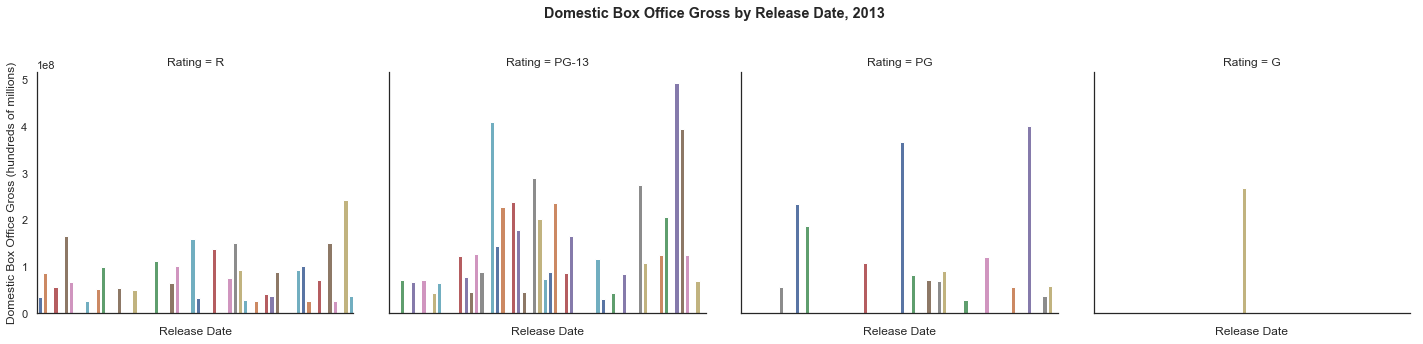

In [620]:
sns_plot = sns.catplot(x='ShortDate', y='DomesticTotalGross', col='Rating', palette="deep", 
                       data=movies_gb_date_rating, kind='bar')
sns_plot.fig.suptitle("Domestic Box Office Gross by Release Date, 2013", fontweight='bold')
sns_plot.fig.subplots_adjust(top=.8)
sns_plot.set_axis_labels("Release Date", "Domestic Box Office Gross (hundreds of millions)")
# sns_plot.set_xticklabels(rotation=75)
sns_plot.set(xticklabels=[])
sns.despine()

## Challenge 5
## What director in your dataset has the highest gross per movie?

In [605]:
movies_gb_director = movies.groupby(['Director'],as_index=False)[['DomesticTotalGross']].mean()

In [606]:
movies_gb_director.sort_values(by=['DomesticTotalGross'], ascending=False).head(1)

,Director,DomesticTotalGross
27,Francis Lawrence,424668047


## Challenge 6
## Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.
## Title of graph should include: Mean Domestic Total Gross by Month in 2013
## Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [617]:
movies_gb_month = (movies
                  .groupby(["Month"],as_index=False)["DomesticTotalGross"]
                  .mean())

In [618]:
movies_gb_month.head()

,Month,DomesticTotalGross
0,01,4.954324e+07
1,02,6.738601e+07
2,03,9.609710e+07
3,04,6.094072e+07
4,05,1.774097e+08


In [609]:
std = sem(movies_gb_month["DomesticTotalGross"])

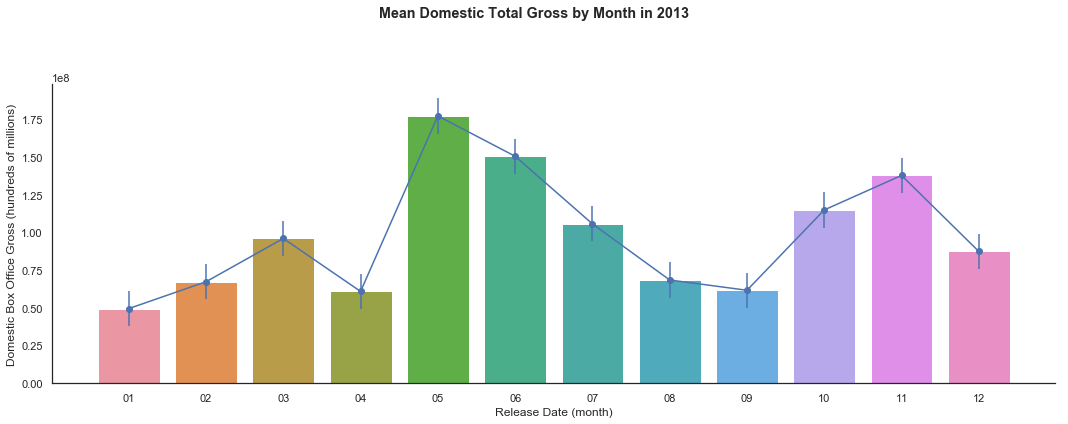

In [619]:
sns_plot = sns.catplot(x='Month', y='DomesticTotalGross', 
                       data=movies_gb_month, kind='bar', height=6, aspect=20/8)
sns_plot.map(plt.errorbar, "Month", "DomesticTotalGross", yerr=std, fmt='-o')
sns_plot.fig.suptitle("Mean Domestic Total Gross by Month in 2013", fontweight='bold')
sns_plot.fig.subplots_adjust(top=.8)
sns_plot.set_axis_labels("Release Date (month)", "Domestic Box Office Gross (hundreds of millions)")
sns_plot.set_xticklabels(rotation=0)
#sns_plot.set(xticklabels=[])
sns.despine()